In [2]:
import pandas as pd
reviews = pd.read_csv("./winemag-data_first150k.csv", index_col=0)
import seaborn as sns

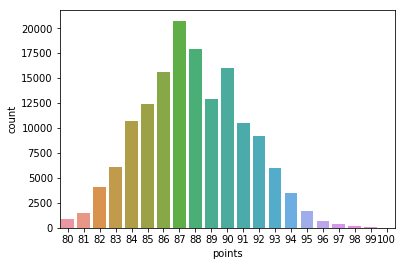

In [6]:
## Countplot

sns.countplot(reviews['points'])


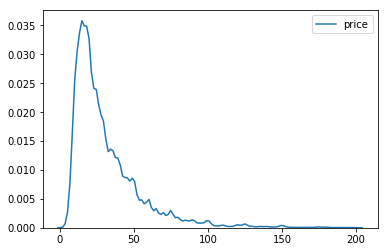

In [7]:
## KDE Plot
sns.kdeplot(reviews.query('price < 200').price)

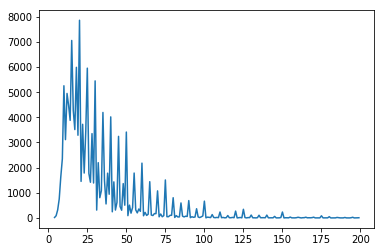

In [5]:

reviews[reviews['price'] < 200]['price'].value_counts().sort_index().plot.line()

/home/adile/miniconda3/lib/python3.6/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


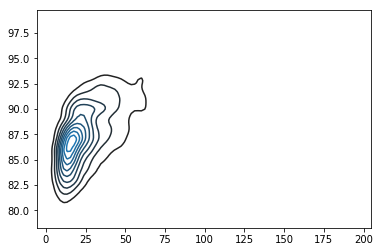

In [8]:
sns.kdeplot(reviews[reviews['price'] < 200].loc[:, ['price', 'points']].dropna().sample(5000))


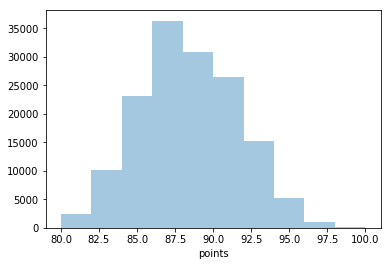

In [9]:
## DISTPLOT
sns.distplot(reviews['points'], bins=10, kde=False)

## Scatterplot and hexplot

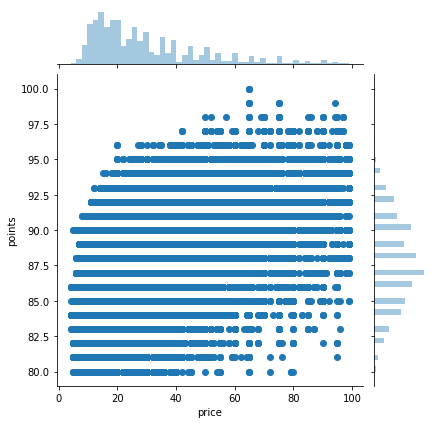

In [10]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100])


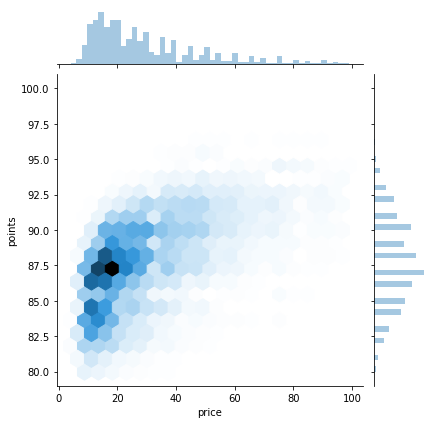

In [11]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100], kind='hex', 
              gridsize=20)


## Boxplot and violin plot

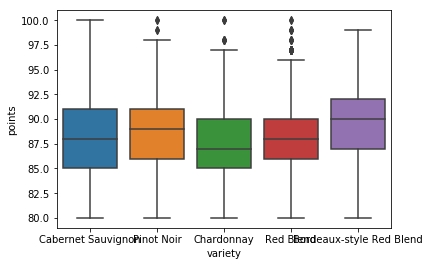

In [12]:
df = reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index)]

sns.boxplot(
    x='variety',
    y='points',
    data=df
)

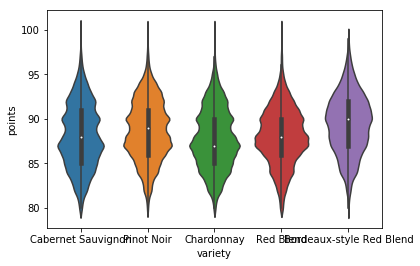

In [13]:
sns.violinplot(
    x='variety',
    y='points',
    data=reviews[reviews.variety.isin(reviews.variety.value_counts()[:5].index)]
)


<!--
My recommendations are:
* Bar plot: 
  * `pd.Series.plot.bar`
  * `sns.countplot`
* Scatter plot:
  * `pd.Series.plot.scatter`
  * `sns.jointplot`
* Hex plot:
  * `pd.Series.plot.hex`
  * `sns.jointplot`
* Line/KDE plot:
  * `pd.Series.plot.line` for nominal categorical variables
  * `sns.kdeplot` for interval variables
* Box/Violin plot:
  * `sns.boxplot`
  * `sns.violinplot`
* Histogram:
   * `sns.distplot`
-->

In [14]:
from IPython.display import HTML
HTML("""
<ol>
<li>A seaborn countplot is like a pandas bar plot.</li>
<li>A seaborn jointplot is like a pandas hex plot.</li>
<li>KDEPlots work by aggregating data into a smooth curve. This is great for interval data but doesn't always work quite as well for ordinal categorical data.</li>
<li>The top of the box is the 75th percentile. The bottom of the box is the 25th percentile. The median, the 50th percentile, is the line in the center of the box. So 50% of the data in the distribution is located within the box!</li>
</ol>
""")